<a href="https://colab.research.google.com/github/Josu4/Analisis-Konsumsi-Energy/blob/main/22_11_4941_Joshua_Juliandika_Putra_(UAS_BDDM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = '/content/power consumption.csv'
data = pd.read_csv(file_path)

In [40]:
print("Data Overview:")
print(data.head(), "\n")

Data Overview:
           DateTime  Temperature  Humidity  Wind Speed  general diffuse flows  \
0  01-01-2017 00:00        6.559      73.8       0.083                  0.051   
1  01-01-2017 00:10        6.414      74.5       0.083                  0.070   
2  01-01-2017 00:20        6.313      74.5       0.080                  0.062   
3  01-01-2017 00:30        6.121      75.0       0.083                  0.091   
4  01-01-2017 00:40        5.921      75.7       0.081                  0.048   

   diffuse flows       Zone 1     Zone 2       Zone 3    
0          0.119  34055.69620  16128.87538  20240.96386  
1          0.085  29814.68354  19375.07599  20131.08434  
2          0.100  29128.10127  19006.68693  19668.43373  
3          0.096  28228.86076  18361.09422  18899.27711  
4          0.085  27335.69620  17872.34043  18442.40964   



In [41]:
print("Data Types:")
print(data.dtypes, "\n")

Data Types:
DateTime                  object
Temperature              float64
Humidity                 float64
Wind Speed               float64
general diffuse flows    float64
diffuse flows            float64
Zone 1                   float64
Zone 2                   float64
Zone 3                   float64
dtype: object 



# Exploratory Data Analysis

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20736 entries, 0 to 49823
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   DateTime               20736 non-null  datetime64[ns]
 1   Temperature            20736 non-null  float64       
 2   Humidity               20736 non-null  float64       
 3   Wind Speed             20736 non-null  float64       
 4   general diffuse flows  20736 non-null  float64       
 5   diffuse flows          20736 non-null  float64       
 6   Zone 1                 20736 non-null  float64       
 7   Zone 2                 20736 non-null  float64       
 8   Zone 3                 20736 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 1.6 MB


In [58]:
data.describe()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1,Zone 2,Zone 3
count,20736,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000,20736.000000
mean,2017-06-22 11:55:00,18.825884,69.109394,1.729066,174.976518,78.654503,32086.712491,20747.253198,17781.417367
min,2017-01-01 00:00:00,4.212000,12.270000,0.050000,0.007000,0.026000,17624.334600,8560.081466,5935.174070
25%,2017-03-27 05:57:30,14.440000,59.467500,0.075000,0.066000,0.122000,26165.609202,16726.715178,13416.656530
50%,2017-06-21 23:55:00,19.185000,71.100000,0.085000,4.532500,4.002000,31935.028565,20533.197560,16387.995200
75%,2017-09-17 11:52:30,23.230000,82.500000,4.910000,303.100000,110.425000,36950.463580,24266.944515,21732.893850
max,2017-12-12 23:50:00,37.260000,94.000000,4.984000,974.000000,909.000000,52204.395120,36482.787750,41415.423200
std,NaN,6.008565,15.458971,2.278698,254.271320,125.980990,7053.231363,5181.114114,6277.698017


# Preprocessing

In [42]:
# Parse DateTime column and handle inconsistencies
data['DateTime'] = pd.to_datetime(data['DateTime'], errors='coerce')
print("Invalid DateTime entries:", data['DateTime'].isnull().sum())

Invalid DateTime entries: 31680


In [43]:
# Check missing values
print("\nMissing Values Per Column:")
print(data.isnull().sum(), "\n")


Missing Values Per Column:
DateTime                 31680
Temperature                  0
Humidity                     0
Wind Speed                   0
general diffuse flows        0
diffuse flows                0
Zone 1                       0
Zone 2                       0
Zone 3                       0
dtype: int64 



In [44]:
# Remove rows with invalid DateTime values
data = data.dropna(subset=['DateTime'])

In [45]:
# Check for missing values
print("\nMissing Values Per Column:")
print(data.isnull().sum(), "\n")


Missing Values Per Column:
DateTime                 0
Temperature              0
Humidity                 0
Wind Speed               0
general diffuse flows    0
diffuse flows            0
Zone 1                   0
Zone 2                   0
Zone 3                   0
dtype: int64 



In [46]:
# Basic statistics
print("Data Statistics:")
print(data.describe(), "\n")

Data Statistics:
                  DateTime   Temperature      Humidity    Wind Speed  \
count                20736  20736.000000  20736.000000  20736.000000   
mean   2017-06-22 11:55:00     18.825884     69.109394      1.729066   
min    2017-01-01 00:00:00      4.212000     12.270000      0.050000   
25%    2017-03-27 05:57:30     14.440000     59.467500      0.075000   
50%    2017-06-21 23:55:00     19.185000     71.100000      0.085000   
75%    2017-09-17 11:52:30     23.230000     82.500000      4.910000   
max    2017-12-12 23:50:00     37.260000     94.000000      4.984000   
std                    NaN      6.008565     15.458971      2.278698   

       general diffuse flows  diffuse flows        Zone 1      Zone 2    \
count           20736.000000   20736.000000  20736.000000  20736.000000   
mean              174.976518      78.654503  32086.712491  20747.253198   
min                 0.007000       0.026000  17624.334600   8560.081466   
25%                 0.066000      

# Distribution of key variables

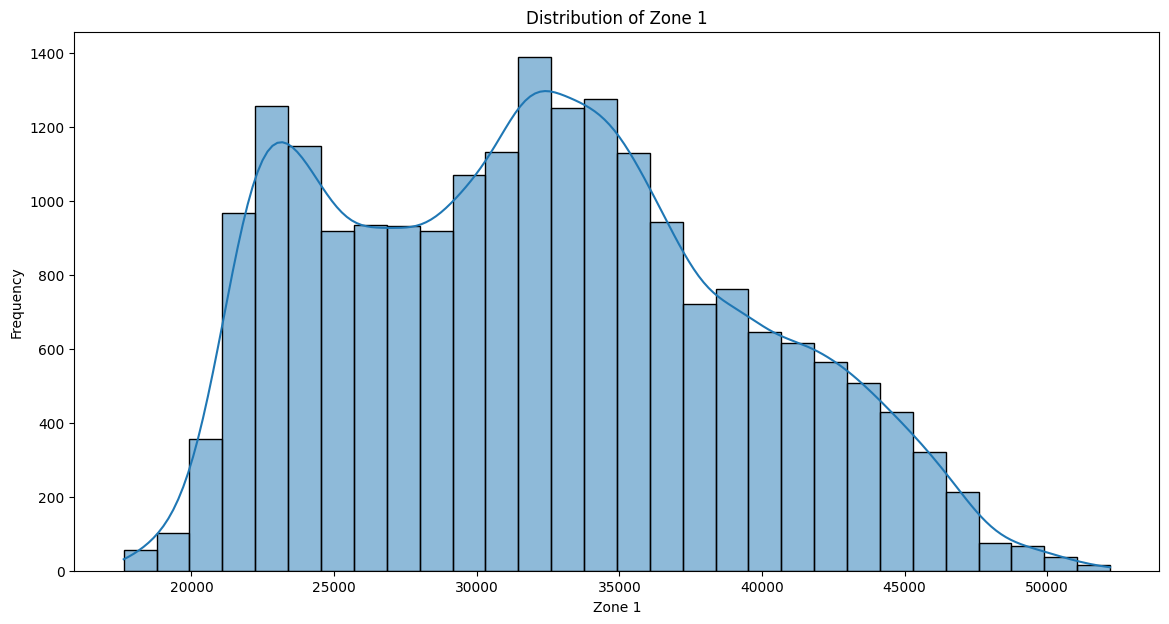

In [61]:
plt.figure(figsize=(14, 7))
sns.histplot(data['Zone 1'], kde=True, bins=30)
plt.title("Distribution of Zone 1")
plt.xlabel("Zone 1")
plt.ylabel("Frequency")
plt.show()

# EDA: Visualizing distributions

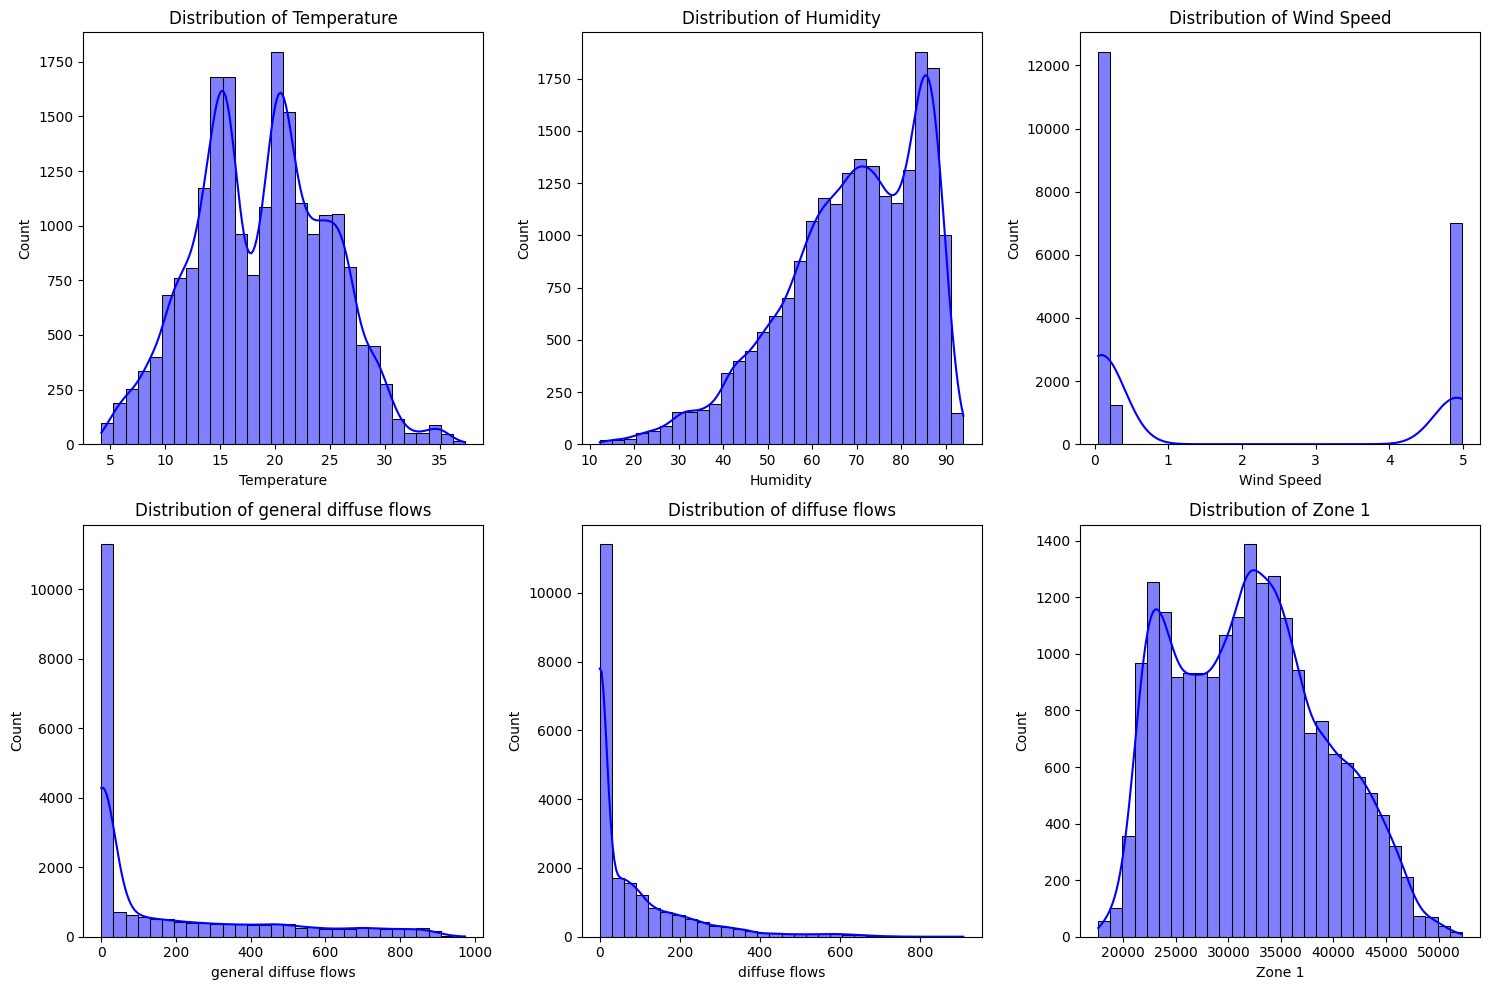

In [47]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(['Temperature', 'Humidity', 'Wind Speed',
                         'general diffuse flows', 'diffuse flows', 'Zone 1']):
    plt.subplot(2, 3, i+1)
    sns.histplot(data[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# EDA: Correlation heatmap

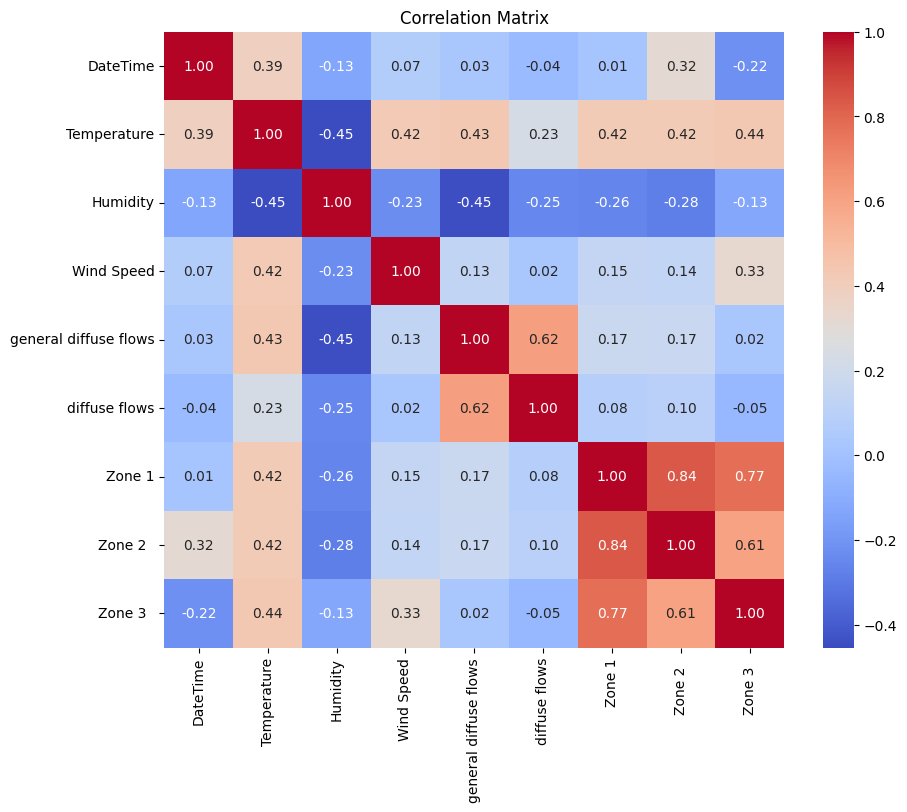

In [48]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

# Feature Selection

In [49]:
correlation_with_target = correlation_matrix['Zone 1'].drop('Zone 1')
print("\nCorrelation with Target (Zone 1):")
print(correlation_with_target)


Correlation with Target (Zone 1):
DateTime                 0.014836
Temperature              0.418537
Humidity                -0.258392
Wind Speed               0.145907
general diffuse flows    0.170915
diffuse flows            0.084350
Zone 2                   0.836018
Zone 3                   0.773076
Name: Zone 1, dtype: float64


In [50]:
# Select features with correlation > 0.1 (absolute value)
selected_features = correlation_with_target[correlation_with_target.abs() > 0.1].index.tolist()
print("\nSelected Features Based on Correlation:", selected_features, "\n")


Selected Features Based on Correlation: ['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows', 'Zone 2  ', 'Zone 3  '] 



# Modeling

In [51]:
# Prepare data for modeling
X = data[selected_features]
y = data['Zone 1']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeling with Multiple Algorithms
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

results = []

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluation
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Append results
    results.append({
        "Model": name,
        "MSE": mse,
        "MAE": mae,
        "R²": r2
    })

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)

# Evaluation

In [52]:
# Display results
print("Model Performance Comparison:")
print(results_df)

Model Performance Comparison:
               Model           MSE          MAE        R²
0  Linear Regression  8.623748e+06  2373.561958  0.827736
1   Ridge Regression  8.623747e+06  2373.562191  0.827736
2   Lasso Regression  8.623744e+06  2373.563775  0.827736
3      Decision Tree  1.818170e+06   781.886675  0.963681
4      Random Forest  8.081907e+05   577.285151  0.983856


<Figure size 1200x600 with 0 Axes>

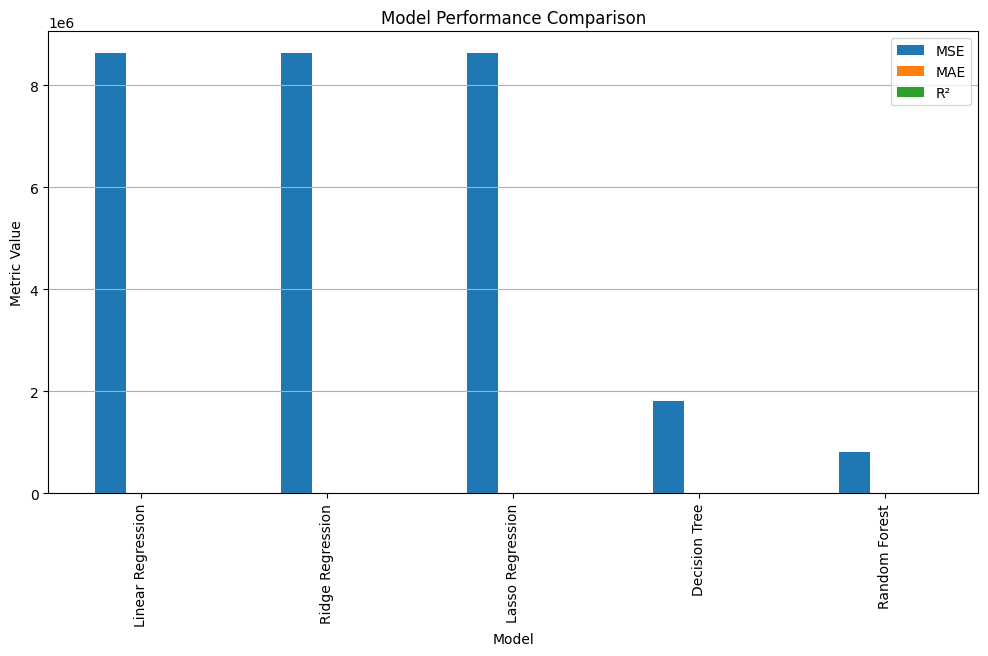

In [53]:
# Visualize results
plt.figure(figsize=(12, 6))
results_df.set_index('Model')[['MSE', 'MAE', 'R²']].plot(kind='bar', figsize=(12, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Metric Value")
plt.grid(axis='y')
plt.show()